In [1]:
using BasisFunctions
using FrameFun
using Domains
using Plots;pyplot();

# One-dimensional smoothing

In [2]:
B = FourierBasis(301,-1,1)
D = interval(-0.5,0.5)
f = x -> exp(x)
fscale = i -> 10.0^-4+abs(i)+abs(i)^2+abs(i)^3
F = Fun(f,B,D; solver=FrameFun.FE_ProjectionSolver)
F2 = Fun(f,B,D;solver=FrameFun.FE_SmoothProjectionSolver,scale=fscale)

A 1-dimensional SetFun with 301 degrees of freedom.
Basis: Fourier series, mapped to [ -1.0  ,  1.0 ]
Domain: the interval [-0.5, 0.5]



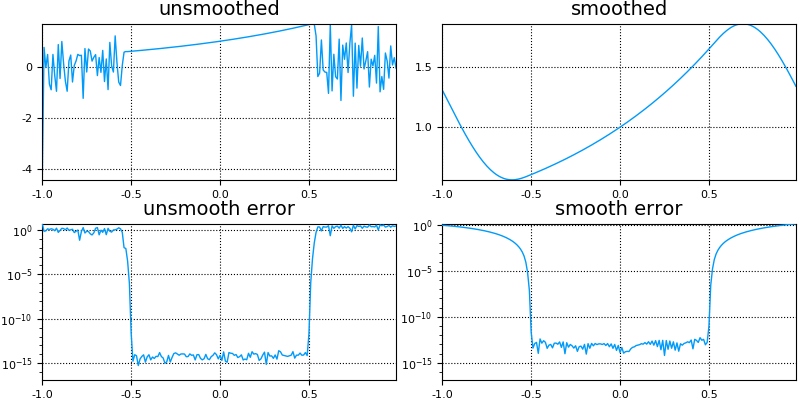

In [3]:
plot(F,layout=4,plot_ext=true,title="unsmoothed")
plot!(F2,subplot=2,plot_ext=true,title="smoothed")
plot!(F,f,subplot=3,title="unsmooth error")
plot!(F2,f,subplot=4,title="smooth error")

### Scaling function determines coefficients decay


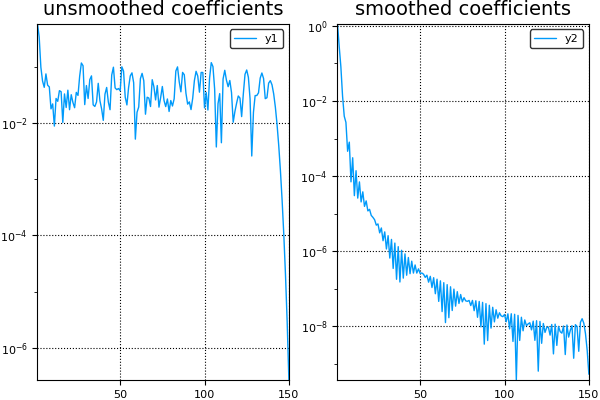

In [4]:
plot(abs.(coefficients(F)[1:Int(round(end/2))]),yscale=:log10,layout=2,title="unsmoothed coefficients")
plot!(abs.(coefficients(F2)[1:Int(round(end/2))]),yscale=:log10,subplot=2,title="smoothed coefficients")

# Two-dimensional smoothing

In [5]:
B = FourierBasis(20,-1,1)⊗FourierBasis(20,-1,1)
D = disk(0.5)
f = (x,y) -> exp(x*y)
fscale = (i,j) -> 10.0^-4+100*abs((i)^2+abs(j^2))
F2 = Fun(f,B,D,solver=FrameFun.FE_SmoothProjectionSolver,scale=fscale)
F = Fun(f,B,D,solver=FrameFun.FE_ProjectionSolver)

A 2-dimensional SetFun with 400 degrees of freedom.
Basis: tensor product (Fourier series, mapped to [ -1.0  ,  1.0 ] x Fourier series, mapped to [ -1.0  ,  1.0 ])
Domain: A mapped domain based on the 2-dimensional unit ball


In [ ]:
heatmap(F,plot_ext=true,layout=2,zlim=[0.6,1.4],title="unsmoothed")
heatmap!(F2,plot_ext=true,subplot=2,zlim=[0.6,1.4],title="smoothed")

# Convergence of the extension

### Fourier

In [ ]:
f = x -> exp(x)
D = interval(-0.5,0.5)
fscale = i -> 10.0^-8+(abs(i))^3+(abs(i))^2+(abs(i))
h = plot()
colors = linspace(colorant"lightgrey",colorant"blue",10)
for i =1:10
    Bi = FourierBasis(2^i+1,-1,1)
    F3 = Fun(f,Bi,D,solver=FrameFun.FE_SmoothProjectionSolver, scale=fscale)
    h = plot!(F3,color=colors[i],plot_ext=true)
end
# The extension converges to something that is 'not' the original function
x = -1:0.01:1
plot!(x,f.(x),color="red")

In [ ]:
f = x -> exp(x)
D = interval(-0.5,0.5)
fscale = i -> 10.0^-8+(abs(i))^3+(abs(i))^2+(abs(i))
h = plot()
colors = linspace(colorant"lightgrey",colorant"blue",10)
for i =1:10
    Bi = ChebyshevBasis(2^i+1,-1,1)
    F3 = Fun(f,Bi,D,solver=FrameFun.FE_SmoothProjectionSolver, scale=fscale)
    h = plot!(F3,color=colors[i],plot_ext=true)
end
# The extension converges to something that is 'not' the original function
x = -1:0.01:1
plot!(x,f.(x),color="red")